In [2]:
import numpy as np
import pywt
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the data from the CSV file
data = pd.read_pickle('../processed_data/data_HR_freq_analysis.pkl')
data.head()


,Participant_ID,old_index_02,real_order_clean,real_order_raw,treatment_group,Scenario,Configuration,Config_recoded,baseline_heart_rate_timeseries,baseline_HRV,treatment__scenario,whole_heart_rate_timeseries,whole_HRV,whole_HR_delta_timeseries,duration_whole,whole_HR_raw_timeseries,whole_HR_raw_RRintervals,whole_HR_raw_zeroTimestamps
0,1,0,0,0,information,A,RH,aRH,"[87.0, 82.0, 79.63793853918517, 79.0, 79.29091...",4.110243,informationA,"[84.07194281334176, 84.0, 83.94966173222761, 8...",4.057934,"[-1.9595558095429766, -2.0314986228847403, -2....",96977,"[84.0, 88.0, 91.0, 94.0, 91.0, 88.0, 85.0, 91....","[-4.0, 4.0, 3.0, 3.0, -3.0, -3.0, -3.0, 6.0, -...","[411000.0, 420000.0, 422000.0, 428000.0, 43100..."
1,1,1,2,1,information,A,EV,pEV,"[87.0, 82.0, 79.63793853918517, 79.0, 79.29091...",4.110243,informationA,"[90.1606085572717, 89.32448552490898, 87.66453...",2.722837,"[4.12910993438696, 3.2929869020242393, 1.63303...",32015,"[85.0, 82.0, 82.0, 85.0, 88.0, 92.0, 89.0, 86....","[-3.0, -3.0, 0.0, 3.0, 3.0, 4.0, -3.0, -3.0, 3...","[521000.0, 522000.0, 523000.0, 524000.0, 52600..."
2,1,2,10,2,information,B,RH,aRH,"[87.0, 82.0, 79.63793853918517, 79.0, 79.29091...",4.110243,informationB,"[77.52587130229857, 77.77647650573256, 78.0853...",6.747817,"[-8.505627320586171, -8.25502211715218, -7.946...",56978,"[80.0, 89.0, 93.0, 97.0, 93.0, 85.0, 81.0, 78....","[3.0, 9.0, 4.0, 4.0, -4.0, -8.0, -4.0, -3.0, 3.0]","[691000.0, 696000.0, 697000.0, 699000.0, 71100..."
3,1,3,12,3,information,B,EV,pEV,"[87.0, 82.0, 79.63793853918517, 79.0, 79.29091...",4.110243,informationB,"[79.54889941989036, 80.0, 80.68749195056465, 8...",2.738299,"[-6.482599202994379, -6.03149862288474, -5.344...",24969,"[80.0, 83.0, 86.0, 83.0, 80.0, 83.0, 80.0, 77.0]","[-4.0, 3.0, 3.0, -3.0, -3.0, 3.0, -3.0, -3.0]","[755000.0, 758000.0, 760000.0, 765000.0, 76800..."
4,1,4,20,4,information,C,RH,aRH,"[87.0, 82.0, 79.63793853918517, 79.0, 79.29091...",4.110243,informationC,"[92.0, 94.64999021082622, 97.0, 99.02409779138...",9.160112,"[5.96850137711526, 8.618491587941477, 10.96850...",41994,"[92.0, 97.0, 100.0, 95.0, 92.0, 87.0, 84.0, 81...","[6.0, 5.0, 3.0, -5.0, -3.0, -5.0, -3.0, -3.0, ...","[888000.0, 890000.0, 892000.0, 895000.0, 89600..."


In [5]:
A = np.concatenate(data[data['Scenario'] == 'A']['whole_heart_rate_timeseries'].values).ravel()
B = np.concatenate(data[data['Scenario'] == 'B']['whole_heart_rate_timeseries'].values).ravel()
C = np.concatenate(data[data['Scenario'] == 'C']['whole_heart_rate_timeseries'].values).ravel()

In [10]:
len(A)

3707

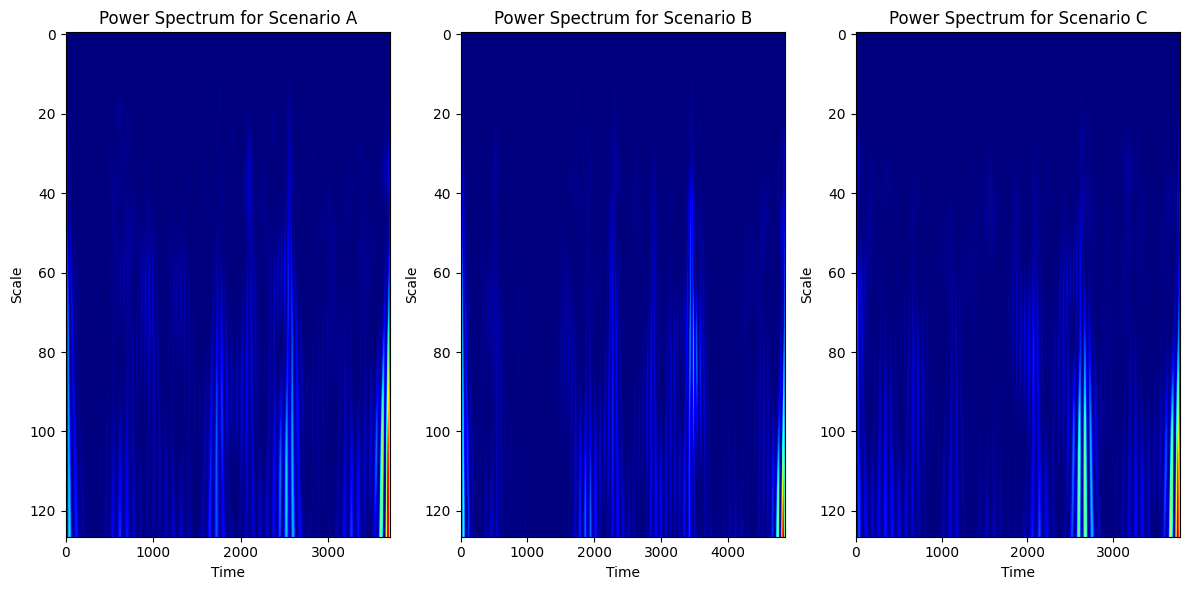

In [6]:
# Perform Wavelet analysis on each scenario's time series
wavelet = 'morl'
scales = np.arange(1, 128)
coefs_a, freqs_a = pywt.cwt(A, scales, wavelet)
coefs_b, freqs_b = pywt.cwt(B, scales, wavelet)
coefs_c, freqs_c = pywt.cwt(C, scales, wavelet)

# Calculate the power spectra for each scenario's time series
power_a = np.abs(coefs_a) ** 2
power_b = np.abs(coefs_b) ** 2
power_c = np.abs(coefs_c) ** 2

# Calculate the average power for each scenario's time series
avg_power_a = np.mean(power_a, axis=1)
avg_power_b = np.mean(power_b, axis=1)
avg_power_c = np.mean(power_c, axis=1)

# Plot the results
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(power_a, cmap='jet', aspect='auto')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Power Spectrum for Scenario A')

plt.subplot(132)
plt.imshow(power_b, cmap='jet', aspect='auto')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Power Spectrum for Scenario B')

plt.subplot(133)
plt.imshow(power_c, cmap='jet', aspect='auto')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Power Spectrum for Scenario C')

plt.tight_layout()
plt.show()

In [19]:
# list(avg_power_a)

In [20]:
from scipy.stats import ttest_ind

# Perform two-sample t-test between average power spectra of scenarios A and B
t_statistic, p_value = ttest_ind(avg_power_a, avg_power_b)

# Print the result of the t-test
if p_value < 0.05:
    print('There is a significant difference between scenarios A and B.')
else:
    print('There is no significant difference between scenarios A and B.')


There is a significant difference between scenarios A and B.


In [21]:
# Perform the Wilcoxon rank-sum test to compare the average power of scenario A and B
from scipy.stats import ranksums

p_AB = ranksums(avg_power_a, avg_power_b)[1]
if p_AB < 0.05:
    print('Scenario A and B have significantly different power spectra.')
else:
    print('Scenario A and B do not have significantly different power spectra.')

# Perform the Wilcoxon rank-sum test to compare the average power of scenario A and C
p_AC = ranksums(avg_power_a, avg_power_c)[1]
if p_AC < 0.05:
    print('Scenario A and C have significantly different power spectra.')
else:
    print('Scenario A and C do not have significantly different power spectra.')

# Perform the Wilcoxon rank-sum test to compare the average power of scenario B and C
p_BC = ranksums(avg_power_b, avg_power_c)[1]
if p_BC < 0.05:
    print('Scenario B and C have significantly different power spectra.')
else:
    print('Scenario B and C do not have significantly different power spectra.')


Scenario A and B have significantly different power spectra.
Scenario A and C do not have significantly different power spectra.
Scenario B and C have significantly different power spectra.


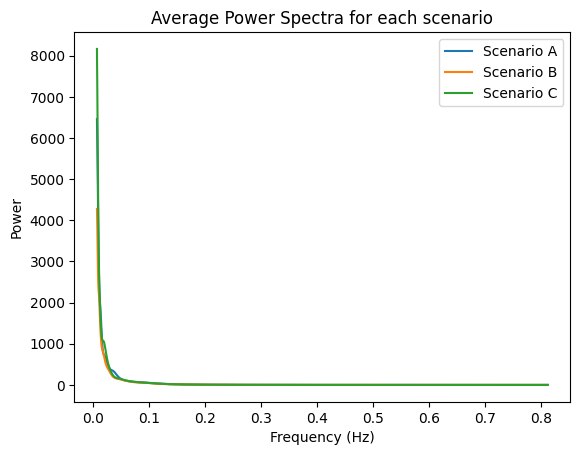

In [22]:
# Plot the average power spectra for each scenario
plt.figure()
plt.plot(freqs_a, avg_power_a, label='Scenario A')
plt.plot(freqs_b, avg_power_b, label='Scenario B')
plt.plot(freqs_c, avg_power_c, label='Scenario C')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Average Power Spectra for each scenario')
plt.legend()


In [23]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine the average power spectra and scenario labels into a single DataFrame
df = pd.DataFrame({'Scenario': ['A']*len(avg_power_a) + ['B']*len(avg_power_b) + ['C']*len(avg_power_c),
                   'Frequency (Hz)': np.concatenate([freqs_a, freqs_b, freqs_c]),
                   'Average Power': np.concatenate([avg_power_a, avg_power_b, avg_power_c])})

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['Average Power'], df['Scenario'])

# Print the Tukey's HSD test results
print(tukey_results)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     A      B -719.3623 0.0162 -1330.4008 -108.3239   True
     A      C  345.4803 0.3792  -265.5581  956.5188  False
     B      C 1064.8426 0.0001   453.8042 1675.8811   True
----------------------------------------------------------


In [24]:
# Extract the heart rate time series for each scenario
hr_a = np.concatenate(data[data['Scenario'] == 'A']['whole_heart_rate_timeseries'].values).ravel()
hr_b = np.concatenate(data[data['Scenario'] == 'B']['whole_heart_rate_timeseries'].values).ravel()
hr_c = np.concatenate(data[data['Scenario'] == 'C']['whole_heart_rate_timeseries'].values).ravel()

# Define the frequency range for LF and HF components
lf_range = (0.04, 0.15)
hf_range = (0.15, 0.4)

from scipy import signal
# Calculate the power spectral density (PSD) for each scenario
freqs_a, psd_a = signal.welch(hr_a, fs=1, nperseg=len(hr_a))
freqs_b, psd_b = signal.welch(hr_b, fs=1, nperseg=len(hr_b))
freqs_c, psd_c = signal.welch(hr_c, fs=1, nperseg=len(hr_c))

lf_power_a = np.trapz(psd_a[(freqs_a >= lf_range[0]) & (freqs_a <= lf_range[1])], freqs_a[(freqs_a >= lf_range[0]) & (freqs_a <= lf_range[1])])
hf_power_a = np.trapz(psd_a[(freqs_a >= hf_range[0]) & (freqs_a <= hf_range[1])], freqs_a[(freqs_a >= hf_range[0]) & (freqs_a <= hf_range[1])])

lf_power_b = np.trapz(psd_b[(freqs_b >= lf_range[0]) & (freqs_b <= lf_range[1])], freqs_b[(freqs_b >= lf_range[0]) & (freqs_b <= lf_range[1])])
hf_power_b = np.trapz(psd_b[(freqs_b >= hf_range[0]) & (freqs_b <= hf_range[1])], freqs_b[(freqs_b >= hf_range[0]) & (freqs_b <= hf_range[1])])

lf_power_c = np.trapz(psd_c[(freqs_c >= lf_range[0]) & (freqs_c <= lf_range[1])], freqs_c[(freqs_c >= lf_range[0]) & (freqs_c <= lf_range[1])])
hf_power_c = np.trapz(psd_c[(freqs_c >= hf_range[0]) & (freqs_c <= hf_range[1])], freqs_c[(freqs_c >= hf_range[0]) & (freqs_c <= hf_range[1])])

In [27]:
hf_power_a

2.2906205921509626

In [25]:
lf_hf_ratio_a = lf_power_a / hf_power_a
lf_hf_ratio_b = lf_power_b / hf_power_b
lf_hf_ratio_c = lf_power_c / hf_power_c

print('LF/HF ratio for Scenario A: {:.2f}'.format(lf_hf_ratio_a))
print('LF/HF ratio for Scenario B: {:.2f}'.format(lf_hf_ratio_b))
print('LF/HF ratio for Scenario C: {:.2f}'.format(lf_hf_ratio_c))

LF/HF ratio for Scenario A: 5.95
LF/HF ratio for Scenario B: 7.08
LF/HF ratio for Scenario C: 6.02


In [110]:
if lf_hf_ratio_a > lf_hf_ratio_b and lf_hf_ratio_a > lf_hf_ratio_c:
    print('Scenario A has a sympathetic response')
elif lf_hf_ratio_b > lf_hf_ratio_a and lf_hf_ratio_b > lf_hf_ratio_c:
    print('Scenario B has a sympathetic response')
else:
    print('Scenario C has a sympathetic response')

Scenario B has a sympathetic response


In [111]:
#treatment
a = np.concatenate(data[data['treatment_group'] == 'information']['whole_heart_rate_timeseries'].values).ravel()
b = np.concatenate(data[data['treatment_group'] == 'efficiency']['whole_heart_rate_timeseries'].values).ravel()


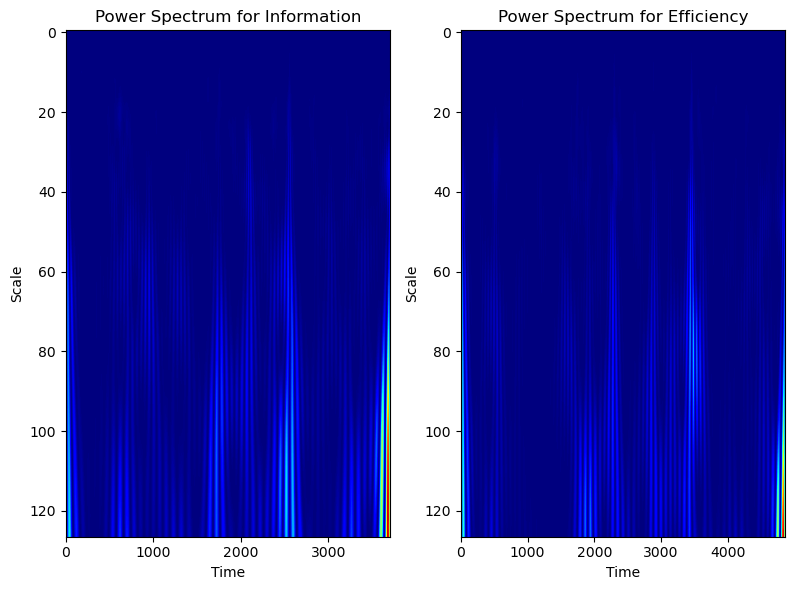

In [112]:
# Perform Wavelet analysis on each scenario's time series
wavelet = 'morl'
scales = np.arange(1, 128)
coefs_a, freqs_a = pywt.cwt(A, scales, wavelet)
coefs_b, freqs_b = pywt.cwt(B, scales, wavelet)

# Calculate the power spectra for each scenario's time series
power_a = np.abs(coefs_a) ** 2
power_b = np.abs(coefs_b) ** 2


# Calculate the average power for each scenario's time series
avg_power_a = np.mean(power_a, axis=1)
avg_power_b = np.mean(power_b, axis=1)


# Plot the results
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(power_a, cmap='jet', aspect='auto')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Power Spectrum for Information')

plt.subplot(132)
plt.imshow(power_b, cmap='jet', aspect='auto')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Power Spectrum for Efficiency')

plt.tight_layout()
plt.show()

In [113]:
from scipy.stats import ttest_ind

# Perform two-sample t-test between average power spectra 
t_statistic, p_value = ttest_ind(avg_power_a, avg_power_b)

# Print the result of the t-test
if p_value < 0.05:
    print('There is a significant difference between Information and Efficiency.')
else:
    print('There is no significant difference between Information and Efficiency.')

There is a significant difference between Information and Efficiency.


In [114]:
# Perform the Wilcoxon rank-sum test to compare the average power of scenario A and B
#compare the average power at each scale/frequency of scenario A and B
from scipy.stats import ranksums

p_AB = ranksums(avg_power_a, avg_power_b)[1]
if p_AB < 0.05:
    print('Information and Efficiency have significantly different power spectra.')
else:
    print('Information and Efficiency do not have significantly different power spectra.')


Information and Efficiency have significantly different power spectra.


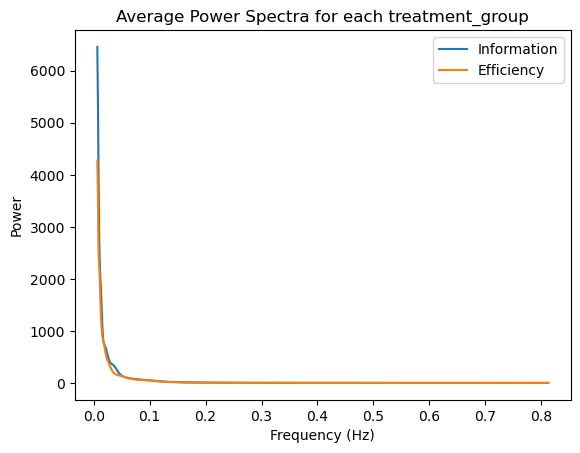

In [115]:
# Plot the average power spectra for each scenario
plt.figure()
plt.plot(freqs_a, avg_power_a, label='Information')
plt.plot(freqs_b, avg_power_b, label='Efficiency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Average Power Spectra for each treatment_group')
plt.legend()

In [116]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine the average power spectra and scenario labels into a single DataFrame
df = pd.DataFrame({'treatment_group': ['information']*len(avg_power_a) + ['efficiency']*len(avg_power_b),
                   'Frequency (Hz)': np.concatenate([freqs_a, freqs_b]),
                   'Average Power': np.concatenate([avg_power_a, avg_power_b])})

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['Average Power'], df['treatment_group'])

# Print the Tukey's HSD test results
print(tukey_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2   meandiff p-adj   lower    upper   reject
---------------------------------------------------------------
efficiency information 719.3623 0.0013 284.2316 1154.493   True
---------------------------------------------------------------


254

In [118]:
# Extract the heart rate time series for each treatment_group
hr_a = np.concatenate(data[data['treatment_group'] == 'information']['whole_heart_rate_timeseries'].values).ravel()
hr_b = np.concatenate(data[data['treatment_group'] == 'efficiency']['whole_heart_rate_timeseries'].values).ravel()


# Define the frequency range for LF and HF components
lf_range = (0.04, 0.15)
hf_range = (0.15, 0.4)



In [119]:
from scipy import signal
# Calculate the power spectral density (PSD) for treatment group
freqs_a, psd_a = signal.welch(hr_a, fs=1, nperseg=len(hr_a))
freqs_b, psd_b = signal.welch(hr_b, fs=1, nperseg=len(hr_b))

In [120]:
lf_power_a = np.trapz(psd_a[(freqs_a >= lf_range[0]) & (freqs_a <= lf_range[1])], freqs_a[(freqs_a >= lf_range[0]) & (freqs_a <= lf_range[1])])
hf_power_a = np.trapz(psd_a[(freqs_a >= hf_range[0]) & (freqs_a <= hf_range[1])], freqs_a[(freqs_a >= hf_range[0]) & (freqs_a <= hf_range[1])])

lf_power_b = np.trapz(psd_b[(freqs_b >= lf_range[0]) & (freqs_b <= lf_range[1])], freqs_b[(freqs_b >= lf_range[0]) & (freqs_b <= lf_range[1])])
hf_power_b = np.trapz(psd_b[(freqs_b >= hf_range[0]) & (freqs_b <= hf_range[1])], freqs_b[(freqs_b >= hf_range[0]) & (freqs_b <= hf_range[1])])


In [121]:
lf_hf_ratio_a = lf_power_a / hf_power_a
lf_hf_ratio_b = lf_power_b / hf_power_b


In [124]:
print('LF/HF ratio for Information: {:.2f}'.format(lf_hf_ratio_a))
print('LF/HF ratio for efficiency: {:.2f}'.format(lf_hf_ratio_b))


LF/HF ratio for Information: 7.74
LF/HF ratio for efficiency: 8.85
